# Notebook for TAFT
## Time alignment for tiles 

In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from melp import Detector
import melp.taft

import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["264653","2a9d8f","e76f51","e9c46a"]) 
# https://coolors.co/palettes/popular
plt.rcParams.update({'font.size': 20})
#from melp.taft import get_median_from_hist, read_histo, select

## Creating/Loading detector with misalignment

In [4]:
mu3e_detector = Detector.initFromROOT("./run42_20000.root")
#mu3e_detector = Detector.initFromSave("calibration_iteration2_v1.det")
#mu3e_detector = Detector.initFromSave("test_det.dev")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [5]:
melp.taft.select(mu3e_detector)

In [6]:
histogram = melp.taft.read_histo('/run/media/maximilian/Volume/merged.root')

In [7]:
station_test = 200000

In [8]:
time_of_flight_arr = []

for z in range(len(mu3e_detector.TileDetector.row_ids(0, station_test))):
    tmp_arr = []
    for id in mu3e_detector.TileDetector.column_ids(z, station_test):
        prob = np.array([0.5])
        # q for result (has to be np.array because of type casting)
        q = np.array([0.])
        histogram[id][0].GetQuantiles(1, q, prob)
        
        tmp_arr.append(q[0])
    
    time_of_flight_arr.append(tmp_arr)

Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero
Error in <TH1D::ComputeIntegral>: Integral = zero


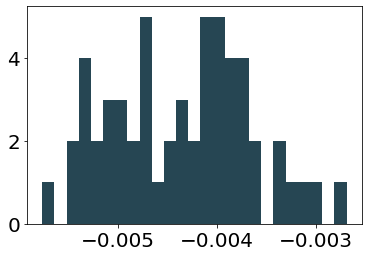

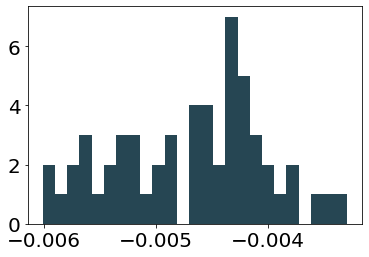

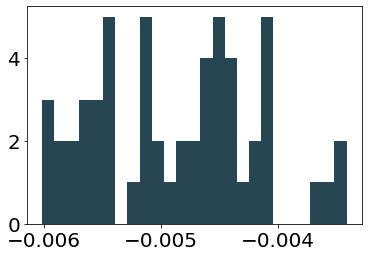

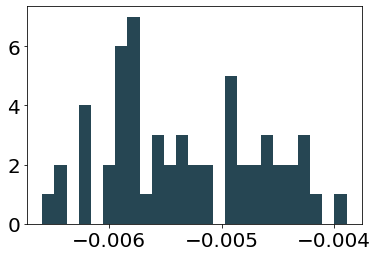

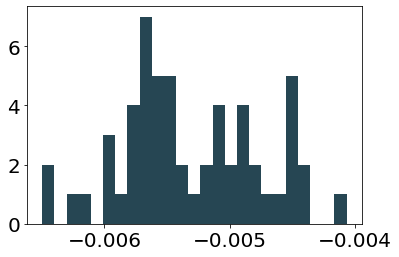

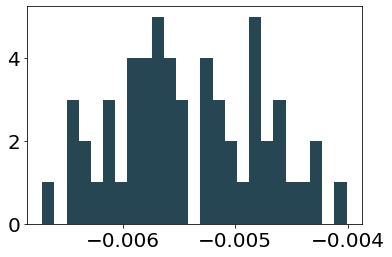

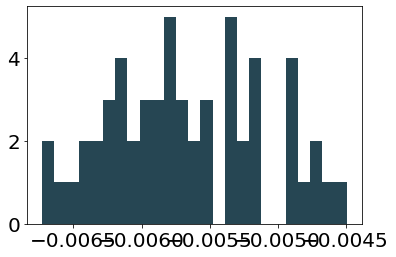

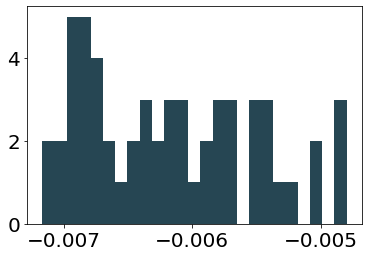

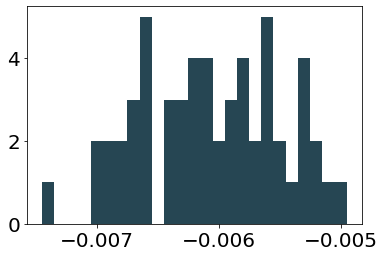

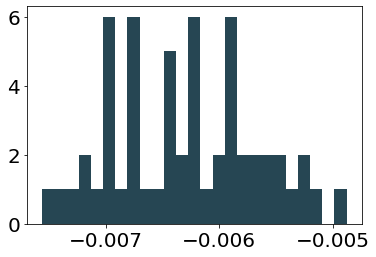

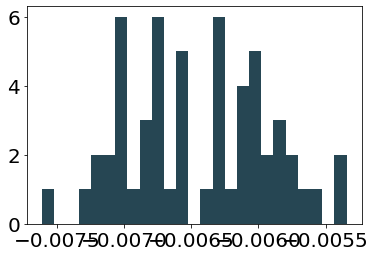

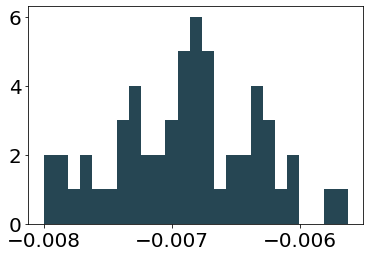

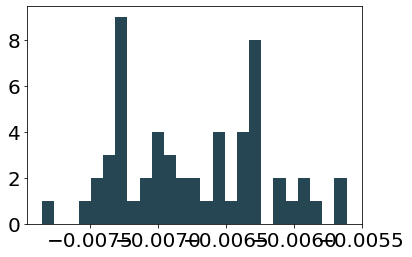

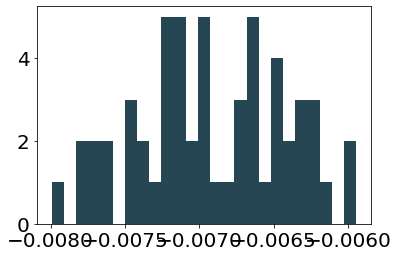

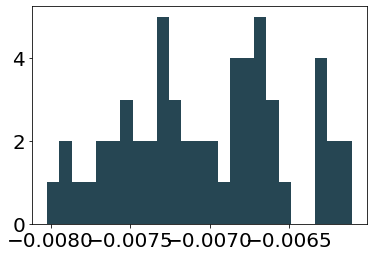

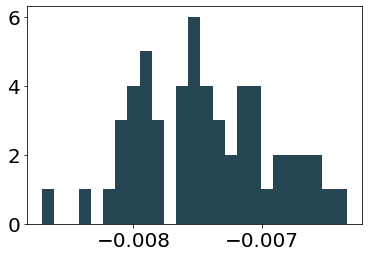

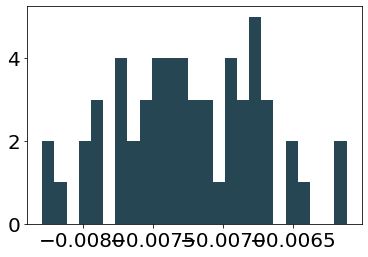

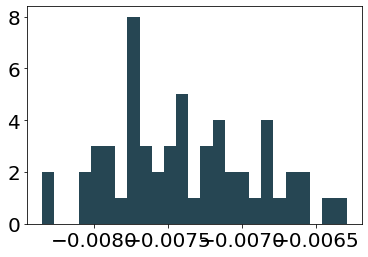

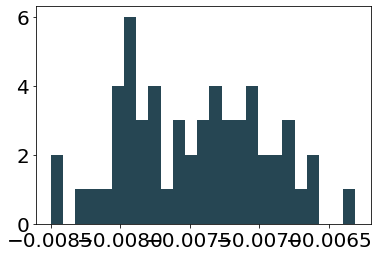

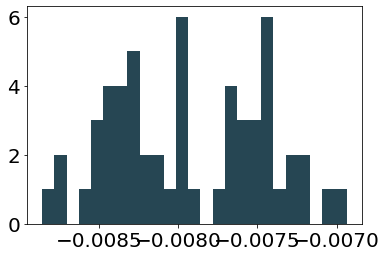

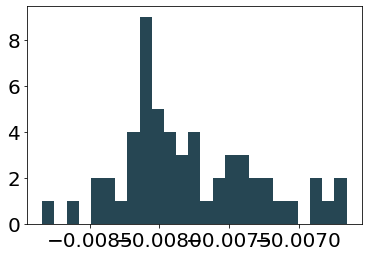

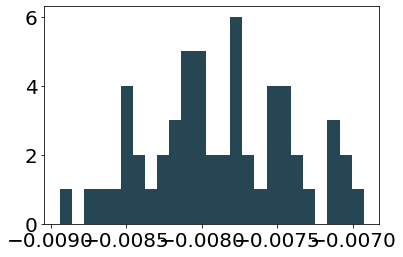

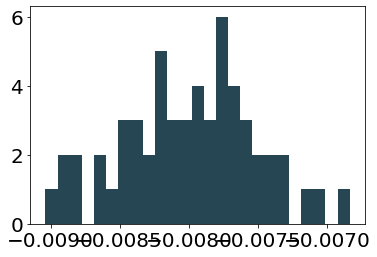

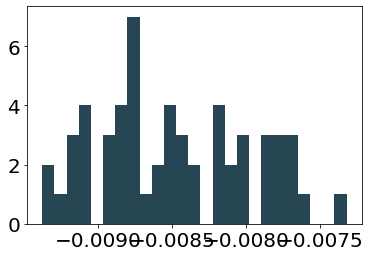

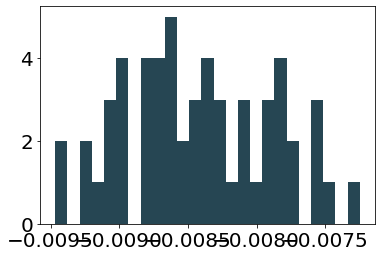

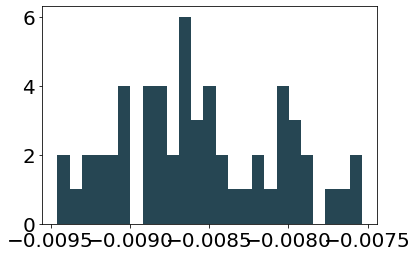

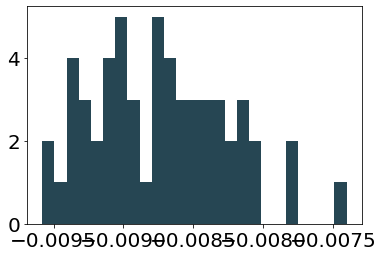

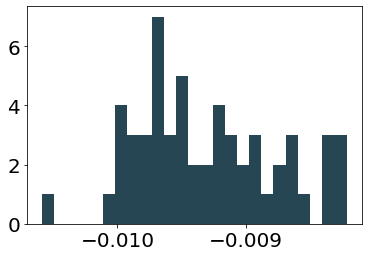

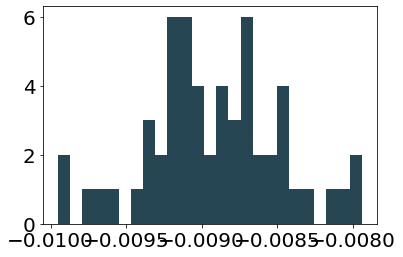

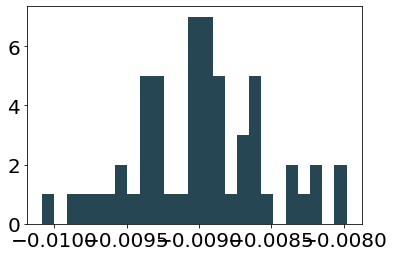

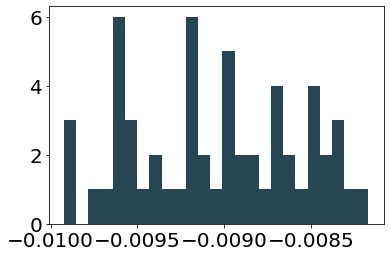

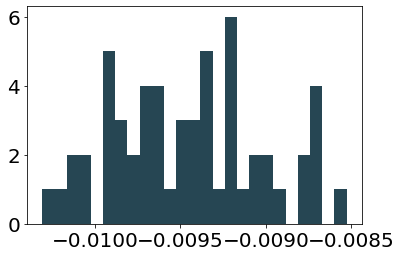

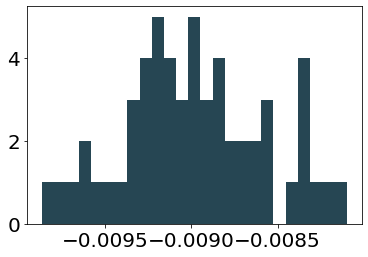

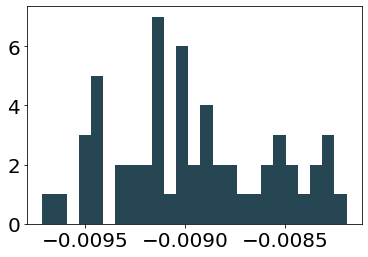

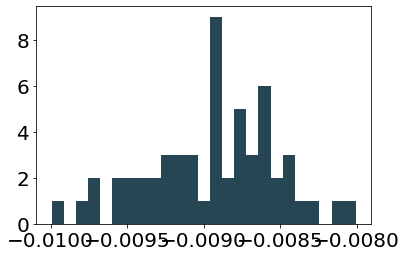

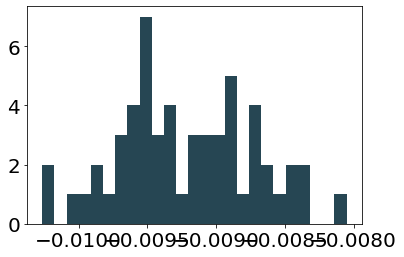

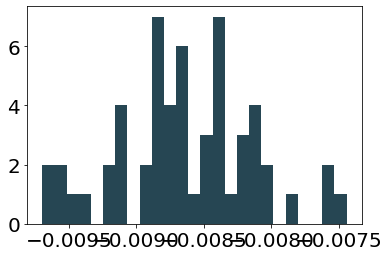

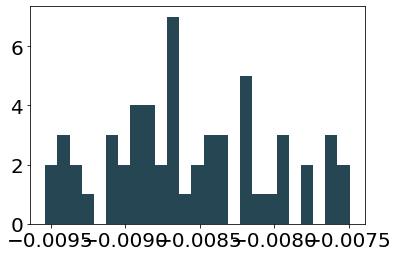

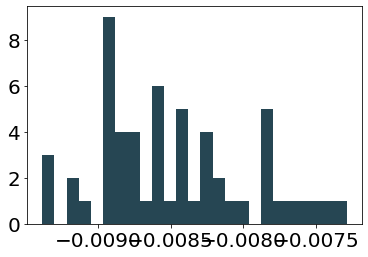

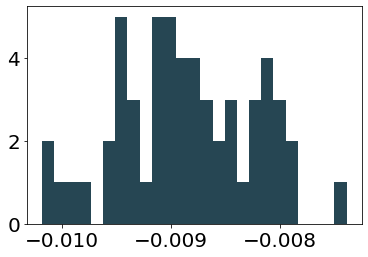

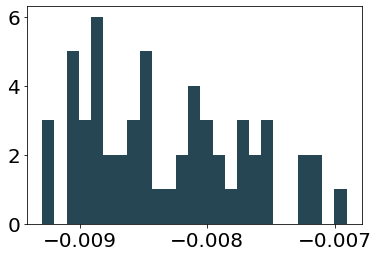

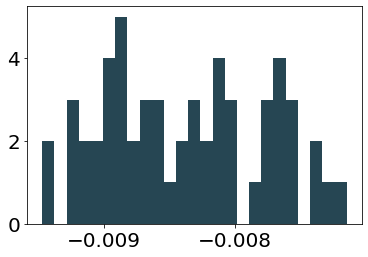

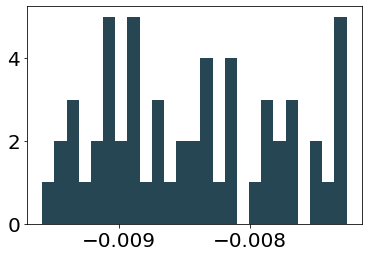

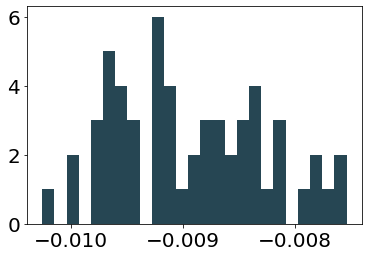

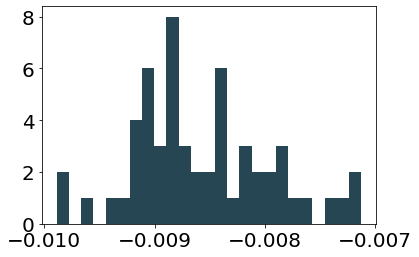

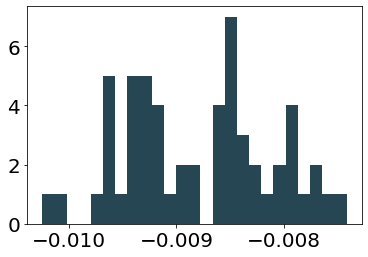

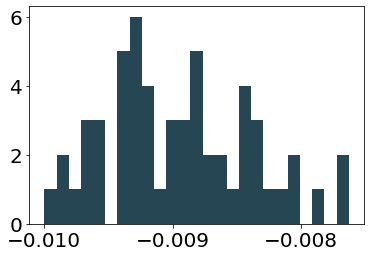

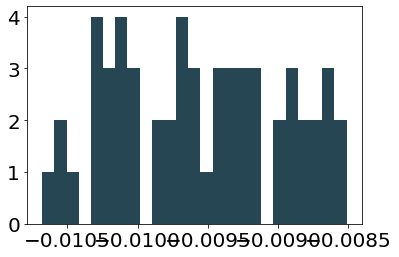

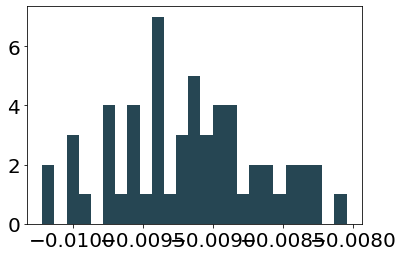

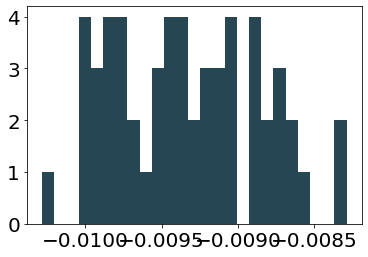

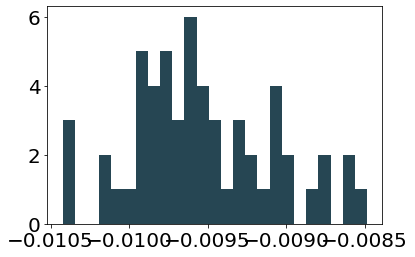

In [9]:
mean = []
pos = []
pos_z = []

for z in range(len(mu3e_detector.TileDetector.row_ids(0, station_test))-1):
    plt.hist(time_of_flight_arr[z], bins=25)
    plt.show()
    z_pos = mu3e_detector.TileDetector.tile[mu3e_detector.TileDetector.column_ids(z, station_test)[0]].pos
    pos.append(z_pos[2])
    pos_z.append(z_pos)
    mean.append(np.mean(time_of_flight_arr[z]))

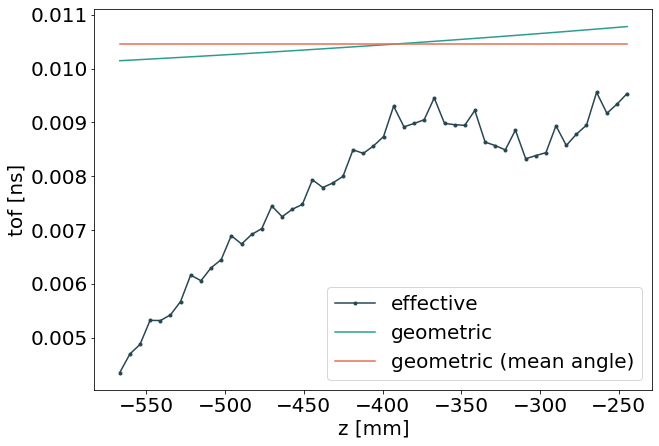

In [26]:
fig = plt.figure(figsize=(10, 7))

plt.plot(pos, abs(np.asarray(mean)), marker=".", label="effective")

tof_corr = []
alpha = []
for z in pos_z:
    tof_corr.append(melp.taft.tof_z_graf(z))#-0.02)
    alpha.append((melp.taft.alpha_from_z(z[2])/(np.pi))*180)
    #of_corr.append(melp.taft.tof_z_new_better(z))
    
plt.plot(pos, np.asarray(tof_corr), label="geometric")
plt.plot(pos, np.full((51),0.010448), label="geometric (mean angle)")
plt.legend()
plt.ylabel("tof [ns]")
plt.xlabel("z [mm]")
plt.show()

In [11]:
alpha

[-14.741449575000004,
 -14.863207525000007,
 -14.98496547500001,
 -15.10672342500001,
 -15.231330624999998,
 -15.353088575000001,
 -15.474846525000006,
 -15.596604475000007,
 -15.721211675000006,
 -15.84296962500001,
 -15.96472757500001,
 -16.086485525,
 -16.211092725,
 -16.332850675000003,
 -16.454608625000006,
 -16.57636657500001,
 -16.70097377500001,
 -16.82273172500001,
 -16.944489675,
 -17.066247625,
 -17.190854825000002,
 -17.312612775000005,
 -17.434370725000008,
 -17.55612867500001,
 -17.68073587500001,
 -17.802493825,
 -17.924251775000002,
 -18.046009725000005,
 -18.170616925000004,
 -18.292374875000007,
 -18.41413282500001,
 -18.535890775,
 -18.660497975,
 -18.782255925,
 -18.904013875000004,
 -19.025771825000007,
 -19.15037902500001,
 -19.27213697500001,
 -19.393894924999998,
 -19.515652874999997,
 -19.640260075,
 -19.762018025000003,
 -19.883775975000006,
 -20.00553392500001,
 -20.13014112500001,
 -20.251899074999997,
 -20.373657025,
 -20.495414975000003,
 -20.6200221750000